In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
data = pd.read_csv("/data/titanic/train.csv")

In [6]:
plt.style.use("ggplot")

## In-Class Exercise 1

Add the fitted logistic regression line to the scatterplot of Fare vs. 
Survival.
	
If you have time, estimate the test error of this model using cross validation.

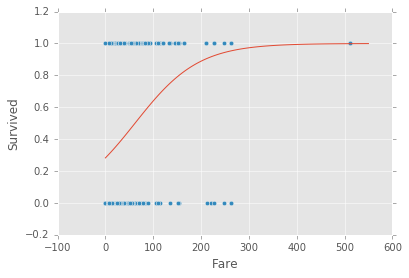

In [21]:
data.plot.scatter(x="Fare", y="Survived")
#shouldnt try to fit linear reg because u cant be 0.4 survived
#model shouldn't contain outputs above 1 or below 0

#use logistic regression to model the log-odds that y = 1

#odds = p(y=1)/p(y=0) = prob of success/prob of failure
#log odds can go from neg inf to pos inf
#can solve for p(y=1)

# we have to convert probability to classication whether or not they survived.

#model.predict_proba() gives probabilities
#model.predict() gives 0 or 1

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

X = data[['Fare']]
y = data['Survived']

model.fit(X,y)

x_test = np.linspace(0,550, 100)

    
X_test = pd.DataFrame(x_test)

y_test = model.predict(X_test)
probs = model.predict_proba(X_test)
#probs hascols that contain prob of surviving and not surviving

plt.plot(X_test,probs[:,1])

In [24]:
from sklearn.cross_validation import cross_val_score

cross_val_score(model,X,y, cv=8, scoring ="accuracy").mean()
# can use scoring = 'recall', 'f1', 'precise'
#2/3 of predictions were correct; accuracy for predicting successful prediction

#precision: what percentage of times I hit the target with a dart?
#recall: out of number of cars I want to recall, how many did I actually get back
#accuracy: #correct predictions / total # of predictions

#use harmonic mean(f1) to find avg of precision and recall<=================================
#the mean is attracted to the lower amount basically

#to compare models, choose one with BIGGEST F1 score

0.66341643997893995

## In-Class Exercise 2

Fit a $10$-nearest neighbors classifier to this data. Then, use the fitted model to predict whether a 40-year old male passenger who paid 50 pounds to ride in first-class survived.
	
If you have time, estimate the test error of this model using cross validation.

In [33]:
#input vars: Pclass,sex,age,fare

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)

data_sub = data[['Survived','Pclass','Sex','Age', 'Fare']].dropna()
data_sub['Male'] = (data['Sex'] =='male') * 1

#now convert Sex to quantitative, but this time sex is binary
X = data_sub[['Pclass','Male','Age','Fare']]
y = data_sub['Survived']




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [40]:
model.predict_proba(pd.DataFrame([
            
            [1,1,40,50],
            [3,1,22,7.25]
                
                ]
        ))

#[1] ...if elt is 1, it means that particular demographic[person] survived
#something WRONG...wait for updated slides

array([[ 0.4,  0.6],
       [ 0.9,  0.1]])

## In-Class Exercise 3

Fit a decision tree classifier to this data using the input variables. Your tree should 
be at least 4 levels deep. Then, use the fitted model to predict whether a 
40-year old male passenger who paid 50 pounds to ride in first-class survived.
	
If you have extra time, print out your tree.

In [36]:
#DEcission tree classifier=============================================

In [1]:
#================today we will look at classification problems where y is categorical and where y is binary.

In [ ]:
#methods: logistic regression, k-nearest neighbors, decision trees

#graph will have only two possible y's.